In [2]:
# Importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import numpy as np
sns.set()

In [3]:
data = pd.read_excel('NEER_Economic_Indicators (1).xlsx', sheet_name = 'main')

data #date format is in YYYY-DD-MM

data.date = pd.to_datetime(data.date.astype(str), format = '%Y-%d-%m') #convert to correct datetime format

data.index = data.date
data.drop('date', inplace=True, axis = 1)

In [4]:
def tsplot(y, lags=50, figsize=(10, 8), title='Time Series Analysis Plots', style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))    
        y.plot(ax=ts_ax)
        p_value = sm.adfuller(y)[1]
        ts_ax.set_title(f'{title}\n Dickey-Fuller: p={p_value:.5f}')
        sm.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        sm.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        plt.tight_layout()
    return

In [5]:
def write_results(file_name, results, columns):
    with open(file_name,"w") as fw:
        print(results.summary(), file=fw)
        fw.write("================test_whiteness================\n")
        print(results.test_whiteness(), file=fw)
        fw.write("================results.roots()================\n")
        for root in results.roots:
            fw.write(str(root)+",")
        fw.write("\n================is_stable================\n")
        fw.write(str(results.is_stable()))
        fw.write("\n================granger causality================\n")
        for V1 in columns:
            for V2 in columns:
                fw.write("Granger test: "+V2+"-->"+V1+"\n")
                print(results.test_causality(V1, [V2],kind='f').summary(), file=fw)
                fw.write("\n")

        fw.write("\n================long_run effects================\n")
        for effect in results.long_run_effects():
            fw.write(str(effect)+",")
        fw.write("\n================FEVD values================\n")
        print(results.fevd(20).summary,file=fw)

def structural_analyses(file_name, results, lag=20):

    # impulse response analyses
    irf = results.irf(lag)
    fig1 = irf.plot(orth=False)
    plt.savefig(file_name+"_irf_noorth.png")
    # irf.plot(impulse='V1', response="V2")
    fig2 = irf.plot_cum_effects(orth=False)
    plt.savefig(file_name+"_irf_cum_noorth.png")
    results.long_run_effects()

    col = sns.color_palette("hls", 11)
    # forecast error decomposition
    results.fevd(lag).plot()
    plt.savefig(file_name+"_fevd.png")
    fig1.set_figheight(20)
    fig1.set_figwidth(25)
    fig2.set_figheight(20)
    fig2.set_figwidth(25)

In [4]:
#Consider past 10 years data, from Jan 2011 to Feb 2011
start_date = '2011-01-01'
end_date = '2021-02-01'
data=data.loc[start_date:end_date]

In [5]:
data

,neer,cpi,import_price_index,import_price_index_non_oil,import_price_index_food,cpi_food,import_price_index_clothing,cpi_clothing,import_price_index_footwear,cpi_footwear,import_price_index_plumbing&lighting,import_price_index_furniture,import_price_index_electrical,cpi_household_durables,import_price_index_communication,cpi_communication,import_price_index_beverages&tobacco,cpi_misc
date,,,,,,,,,,,,,,,,,,
2011-01-01,102.96,90.405,113.030,106.988,100.239,NaN,87.894,NaN,94.518,NaN,95.891,98.753,107.415,NaN,186.988,NaN,94.914,NaN
2011-02-01,103.11,90.339,115.507,107.294,100.988,NaN,88.116,NaN,94.443,NaN,95.845,98.584,107.688,NaN,186.561,NaN,94.729,NaN
2011-03-01,103.11,90.458,116.868,107.038,100.879,NaN,88.404,NaN,94.413,NaN,95.779,99.111,107.130,NaN,186.661,NaN,94.222,NaN
2011-04-01,103.72,90.774,117.220,106.108,101.632,NaN,88.480,NaN,94.385,NaN,95.510,99.415,106.644,NaN,170.264,NaN,93.889,NaN
2011-05-01,104.23,91.318,115.186,105.549,101.383,NaN,88.976,NaN,96.168,NaN,95.464,99.494,105.838,NaN,170.089,NaN,93.677,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,110.93,99.711,90.992,100.380,101.434,NaN,101.390,NaN,103.499,NaN,105.726,106.511,99.897,NaN,86.745,NaN,95.065,NaN
2020-11-01,110.64,100.105,91.761,100.232,101.820,NaN,101.711,NaN,103.692,NaN,105.726,106.556,99.443,NaN,86.535,NaN,94.960,NaN
2020-12-01,110.62,100.469,93.418,100.208,102.246,NaN,101.347,NaN,103.661,NaN,105.726,105.308,99.687,NaN,86.307,NaN,96.210,NaN


In [6]:
data.columns.values.tolist()

['neer',
 'cpi',
 'import_price_index',
 'import_price_index_non_oil',
 'import_price_index_food',
 'cpi_food',
 'import_price_index_clothing',
 'cpi_clothing',
 'import_price_index_footwear',
 'cpi_footwear',
 'import_price_index_plumbing&lighting',
 'import_price_index_furniture',
 'import_price_index_electrical',
 'cpi_household_durables',
 'import_price_index_communication',
 'cpi_communication',
 'import_price_index_beverages&tobacco',
 'cpi_misc']

In [7]:
focused_columns = ['neer', 'cpi', 'import_price_index'] # Overall model

### To check which data transformation to use for cpi and import_price_index

C:\Users\Shirley Ow\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


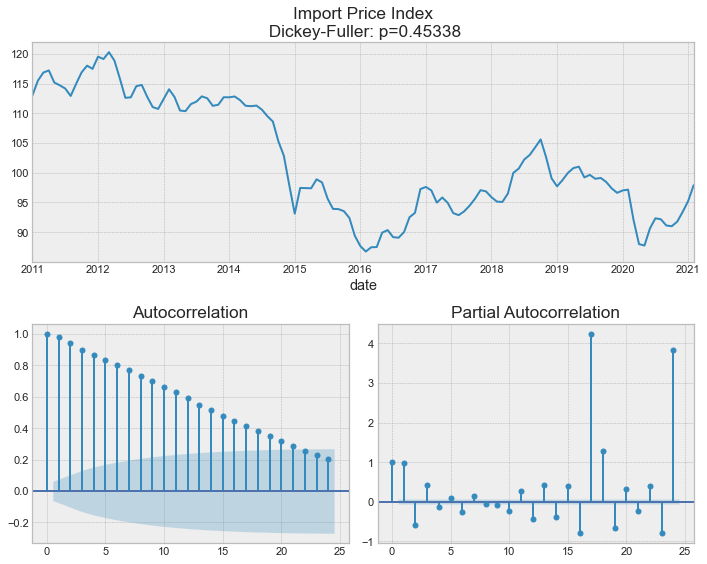

In [14]:
# Data transformation
tsplot(data.import_price_index, lags=24, title='Import Price Index')

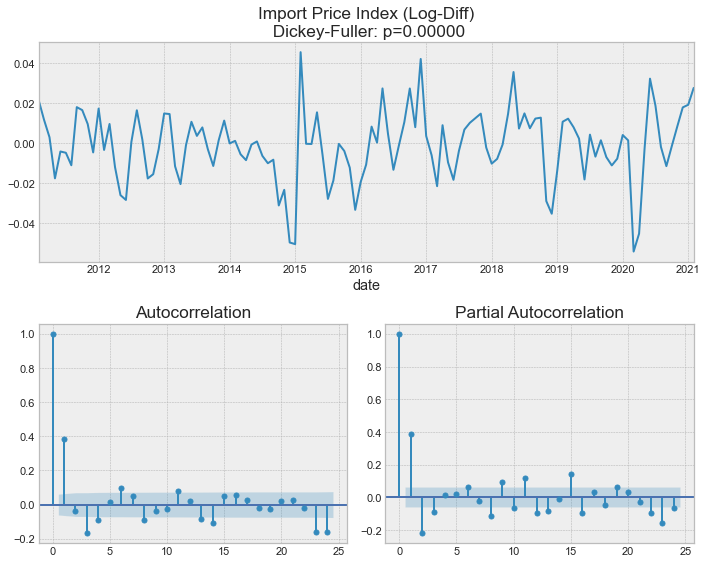

In [15]:
tsplot(np.log(data.import_price_index).diff().dropna(), lags=24, title = 'Import Price Index (Log-Diff)')

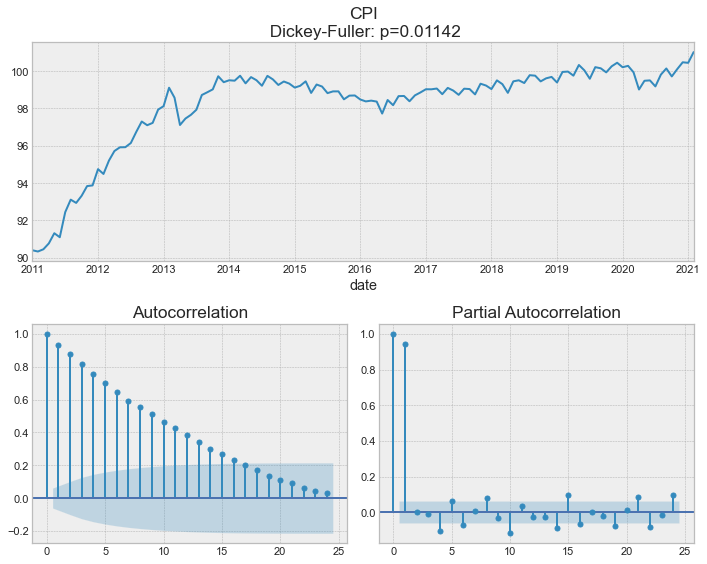

In [8]:
# Data transformation
tsplot(data.cpi, lags=24, title='CPI')

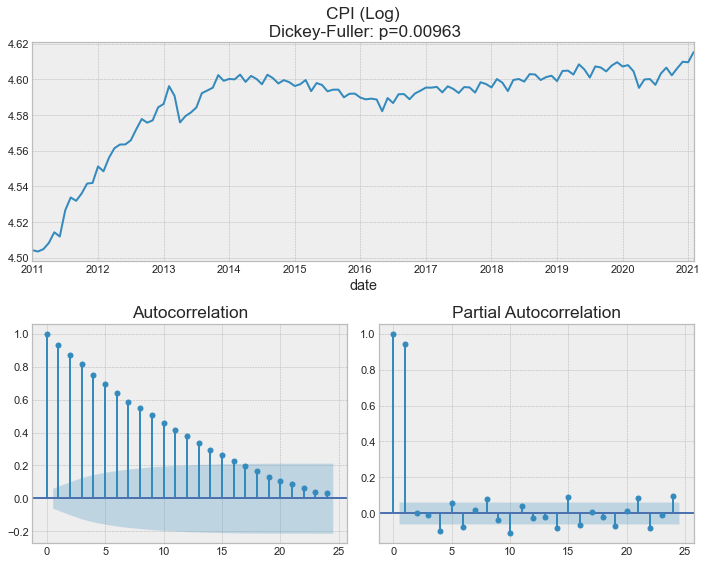

In [9]:
tsplot(np.log(data.cpi), lags=24, title='CPI (Log)')

In [16]:
# taking only subset of dataframe
focused_data = data[focused_columns]

In [17]:
focused_data = np.log(focused_data + 1)
focused_data[['neer', 'import_price_index']] = focused_data[['neer', 'import_price_index']].diff().dropna()
focused_data = focused_data.dropna()
focused_data

,neer,cpi,import_price_index
date,,,
2011-02-01,0.001442,4.514578,0.021490
2011-03-01,0.000000,4.515880,0.011614
2011-04-01,0.005842,4.519329,0.002982
2011-05-01,0.004858,4.525239,-0.017355
2011-06-01,0.000665,4.522908,-0.004062
...,...,...,...
2020-10-01,-0.003389,4.612255,-0.001325
2020-11-01,-0.002594,4.616160,0.008325
2020-12-01,-0.000179,4.619753,0.017705


In [18]:
focused_data['neer']-=STL(focused_data['neer']).fit().seasonal
focused_data['cpi']-=STL(focused_data['cpi']).fit().seasonal
focused_data['import_price_index']-=STL(focused_data['import_price_index']).fit().seasonal

In [20]:
model = VAR(focused_data)
print(model.select_order(10).summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -28.36      -28.29   4.826e-13      -28.33
1       -31.88     -31.59*   1.423e-14     -31.76*
2      -31.92*      -31.41  1.370e-14*      -31.71
3       -31.80      -31.07   1.543e-14      -31.51
4       -31.71      -30.76   1.702e-14      -31.32
5       -31.65      -30.48   1.801e-14      -31.18
6       -31.56      -30.16   1.994e-14      -30.99
7       -31.46      -29.85   2.212e-14      -30.80
8       -31.49      -29.66   2.162e-14      -30.75
9       -31.52      -29.47   2.110e-14      -30.69
10      -31.61      -29.34   1.955e-14      -30.69
--------------------------------------------------


C:\Users\Shirley Ow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [21]:
orders = [1,2]
for o in orders:
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())

Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 120.397, critical value: 103.010>, p-value: 0.003>
Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 83.843, critical value: 92.808>, p-value: 0.161>


In [22]:
selected_order = 2
results = model.fit(selected_order) # trend="c" by default
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Apr, 2021
Time:                     10:41:16
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -31.4824
Nobs:                     119.000    HQIC:                  -31.7737
Log likelihood:           1416.82    FPE:                1.30183e-14
AIC:                     -31.9728    Det(Omega_mle):     1.09669e-14
--------------------------------------------------------------------
Results for equation neer
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.086626         0.074602            1.161           0.246
L1.neer                       0.465531         0.095513            4.874           0.000
L1.cpi                       

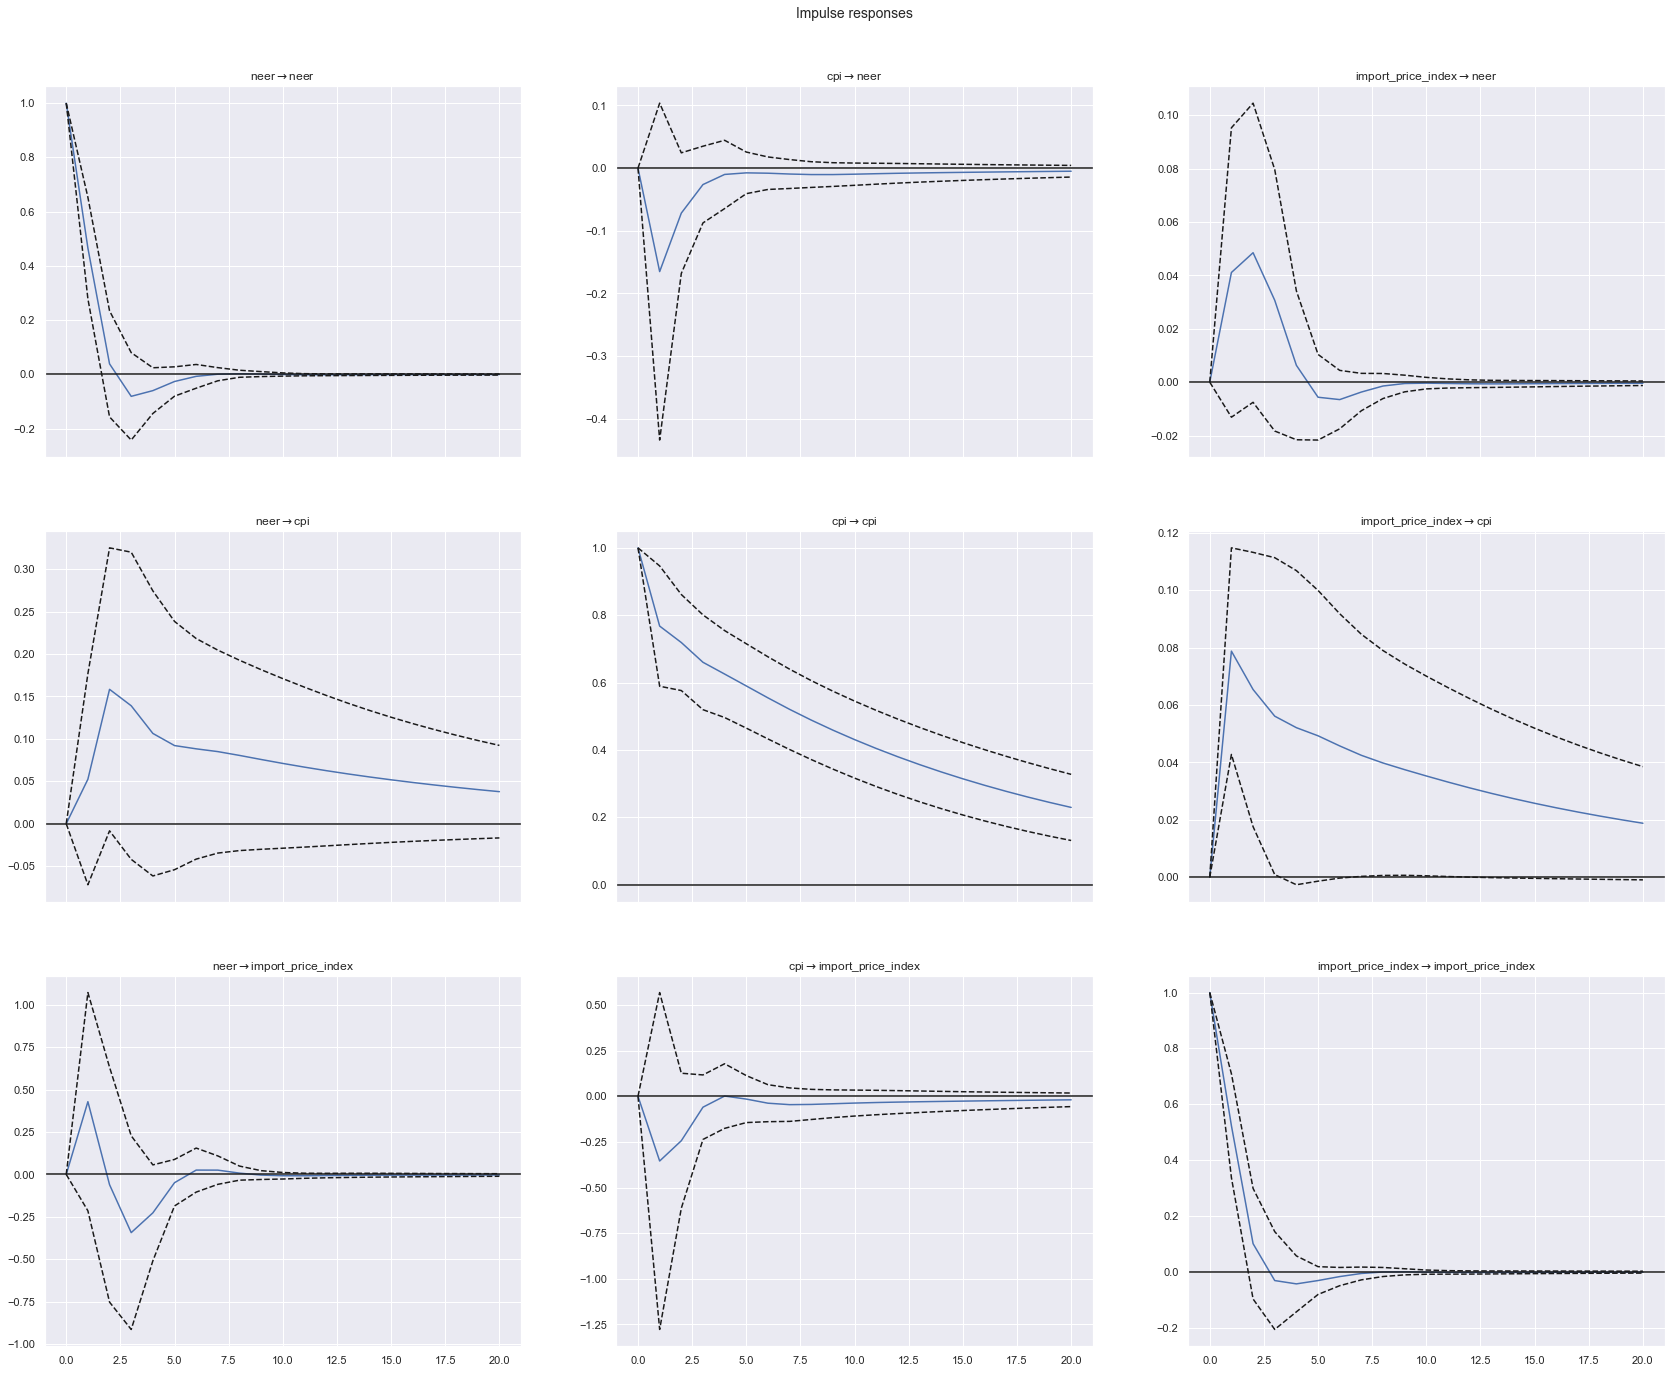

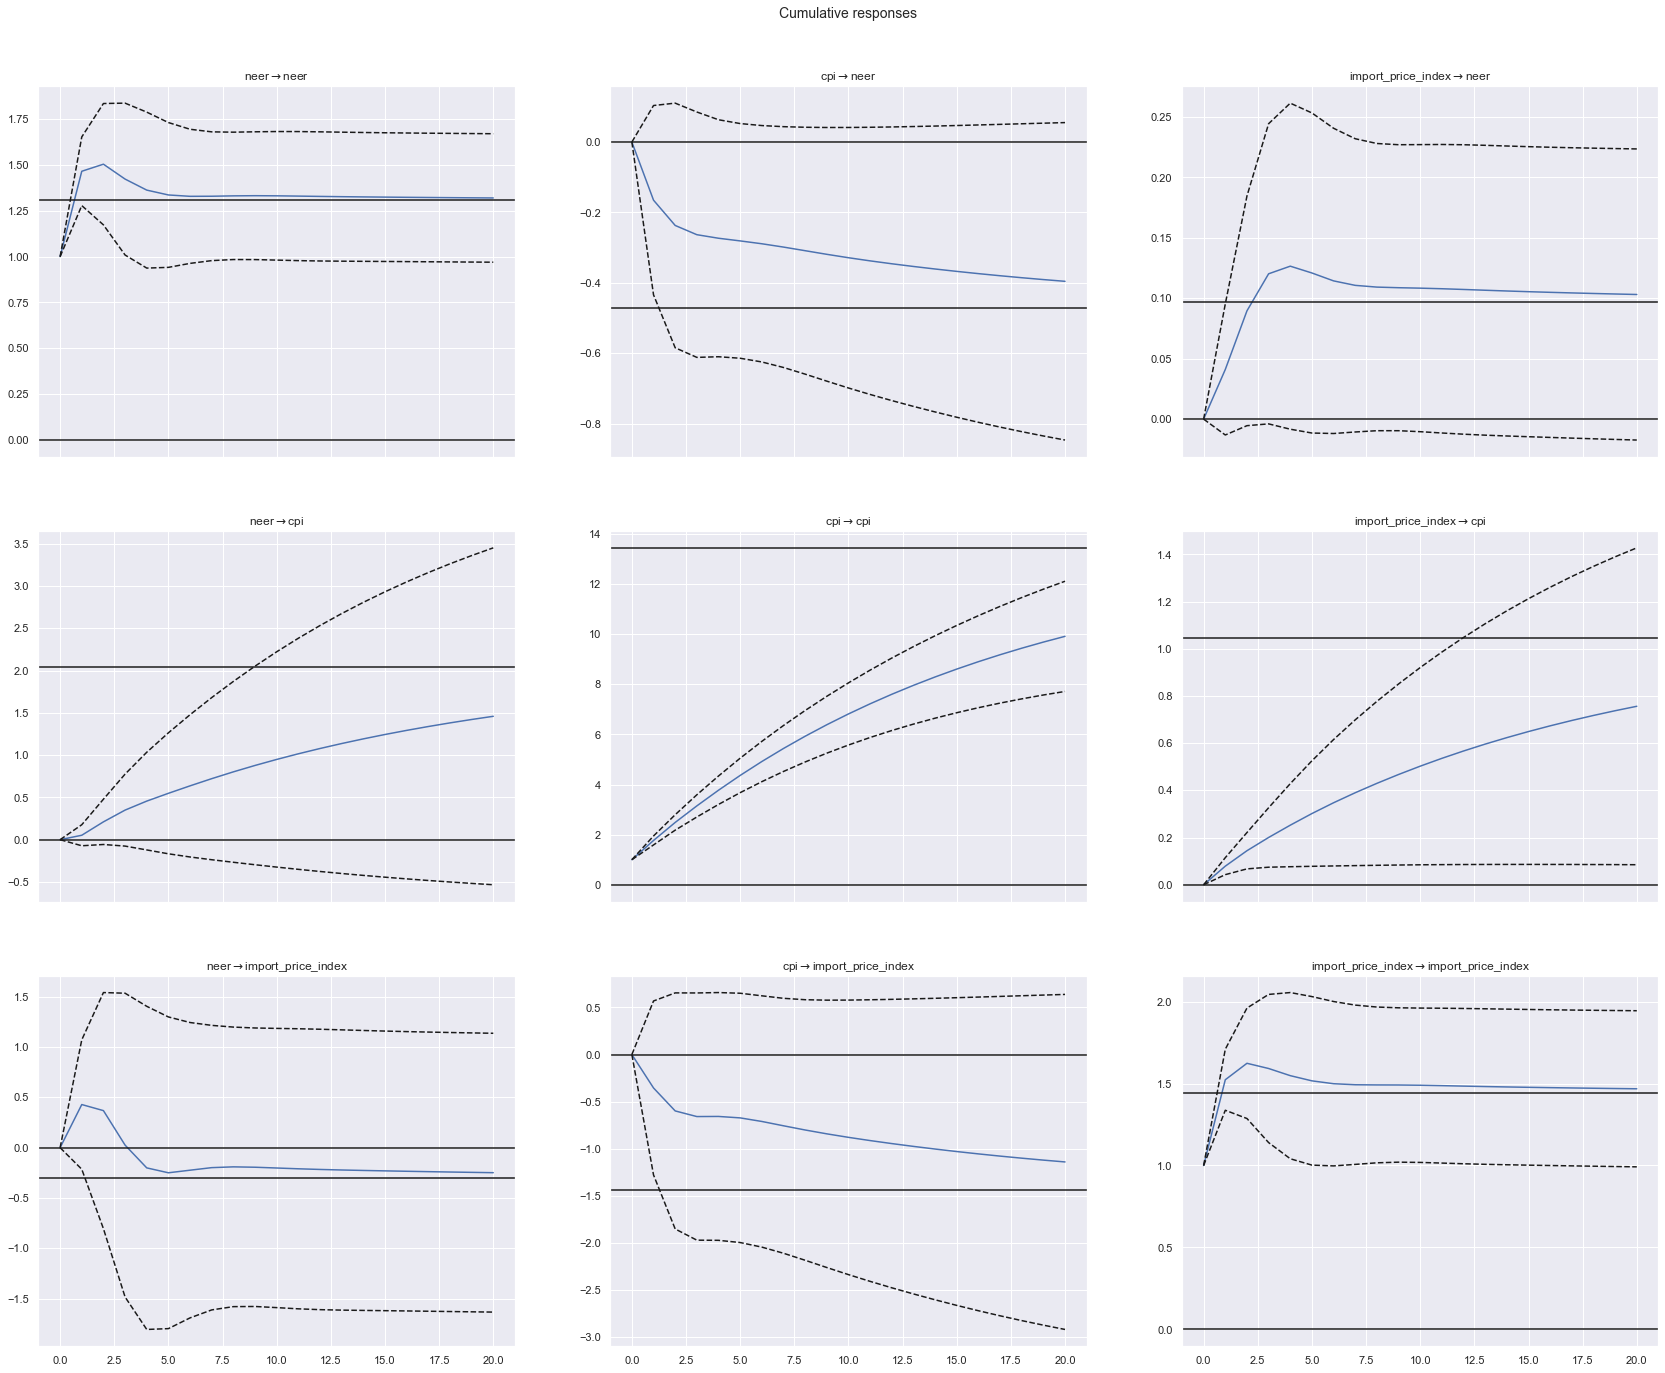

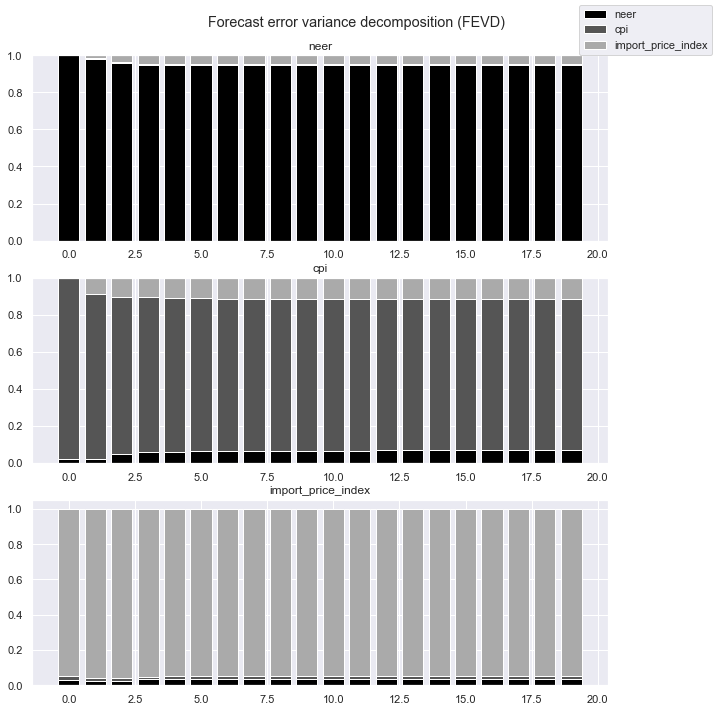

In [23]:
results_file = 'results_lag'+str(selected_order)+'.txt'
structural_file = 'lag'+str(selected_order)
write_results(results_file, results, focused_columns)
structural_analyses(structural_file, results, 20)

---

In [8]:
focused_data = data[focused_columns]
focused_data = np.log(focused_data + 1)
focused_data[['neer', 'import_price_index']] = focused_data[['neer', 'import_price_index']].diff().dropna()
focused_data = focused_data.dropna()
focused_data

,neer,cpi,import_price_index
date,,,
2011-02-01,0.001442,4.514578,0.021490
2011-03-01,0.000000,4.515880,0.011614
2011-04-01,0.005842,4.519329,0.002982
2011-05-01,0.004858,4.525239,-0.017355
2011-06-01,0.000665,4.522908,-0.004062
...,...,...,...
2020-10-01,-0.003389,4.612255,-0.001325
2020-11-01,-0.002594,4.616160,0.008325
2020-12-01,-0.000179,4.619753,0.017705


In [37]:
focused_data['neer']-=seasonal_decompose(focused_data['neer']).seasonal

In [38]:
focused_data['cpi']-=seasonal_decompose(focused_data['cpi']).seasonal

In [39]:
focused_data['import_price_index']-=seasonal_decompose(focused_data['import_price_index']).seasonal

In [20]:
model = VAR(focused_data)
print(model.select_order(10).summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -28.36      -28.29   4.826e-13      -28.33
1       -31.88     -31.59*   1.423e-14     -31.76*
2      -31.92*      -31.41  1.370e-14*      -31.71
3       -31.80      -31.07   1.543e-14      -31.51
4       -31.71      -30.76   1.702e-14      -31.32
5       -31.65      -30.48   1.801e-14      -31.18
6       -31.56      -30.16   1.994e-14      -30.99
7       -31.46      -29.85   2.212e-14      -30.80
8       -31.49      -29.66   2.162e-14      -30.75
9       -31.52      -29.47   2.110e-14      -30.69
10      -31.61      -29.34   1.955e-14      -30.69
--------------------------------------------------


C:\Users\Shirley Ow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [21]:
orders = [1,2]
for o in orders:
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())

Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 120.397, critical value: 103.010>, p-value: 0.003>
Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 83.843, critical value: 92.808>, p-value: 0.161>


In [22]:
selected_order = 2
results = model.fit(selected_order) # trend="c" by default
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Apr, 2021
Time:                     10:41:16
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -31.4824
Nobs:                     119.000    HQIC:                  -31.7737
Log likelihood:           1416.82    FPE:                1.30183e-14
AIC:                     -31.9728    Det(Omega_mle):     1.09669e-14
--------------------------------------------------------------------
Results for equation neer
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.086626         0.074602            1.161           0.246
L1.neer                       0.465531         0.095513            4.874           0.000
L1.cpi                       

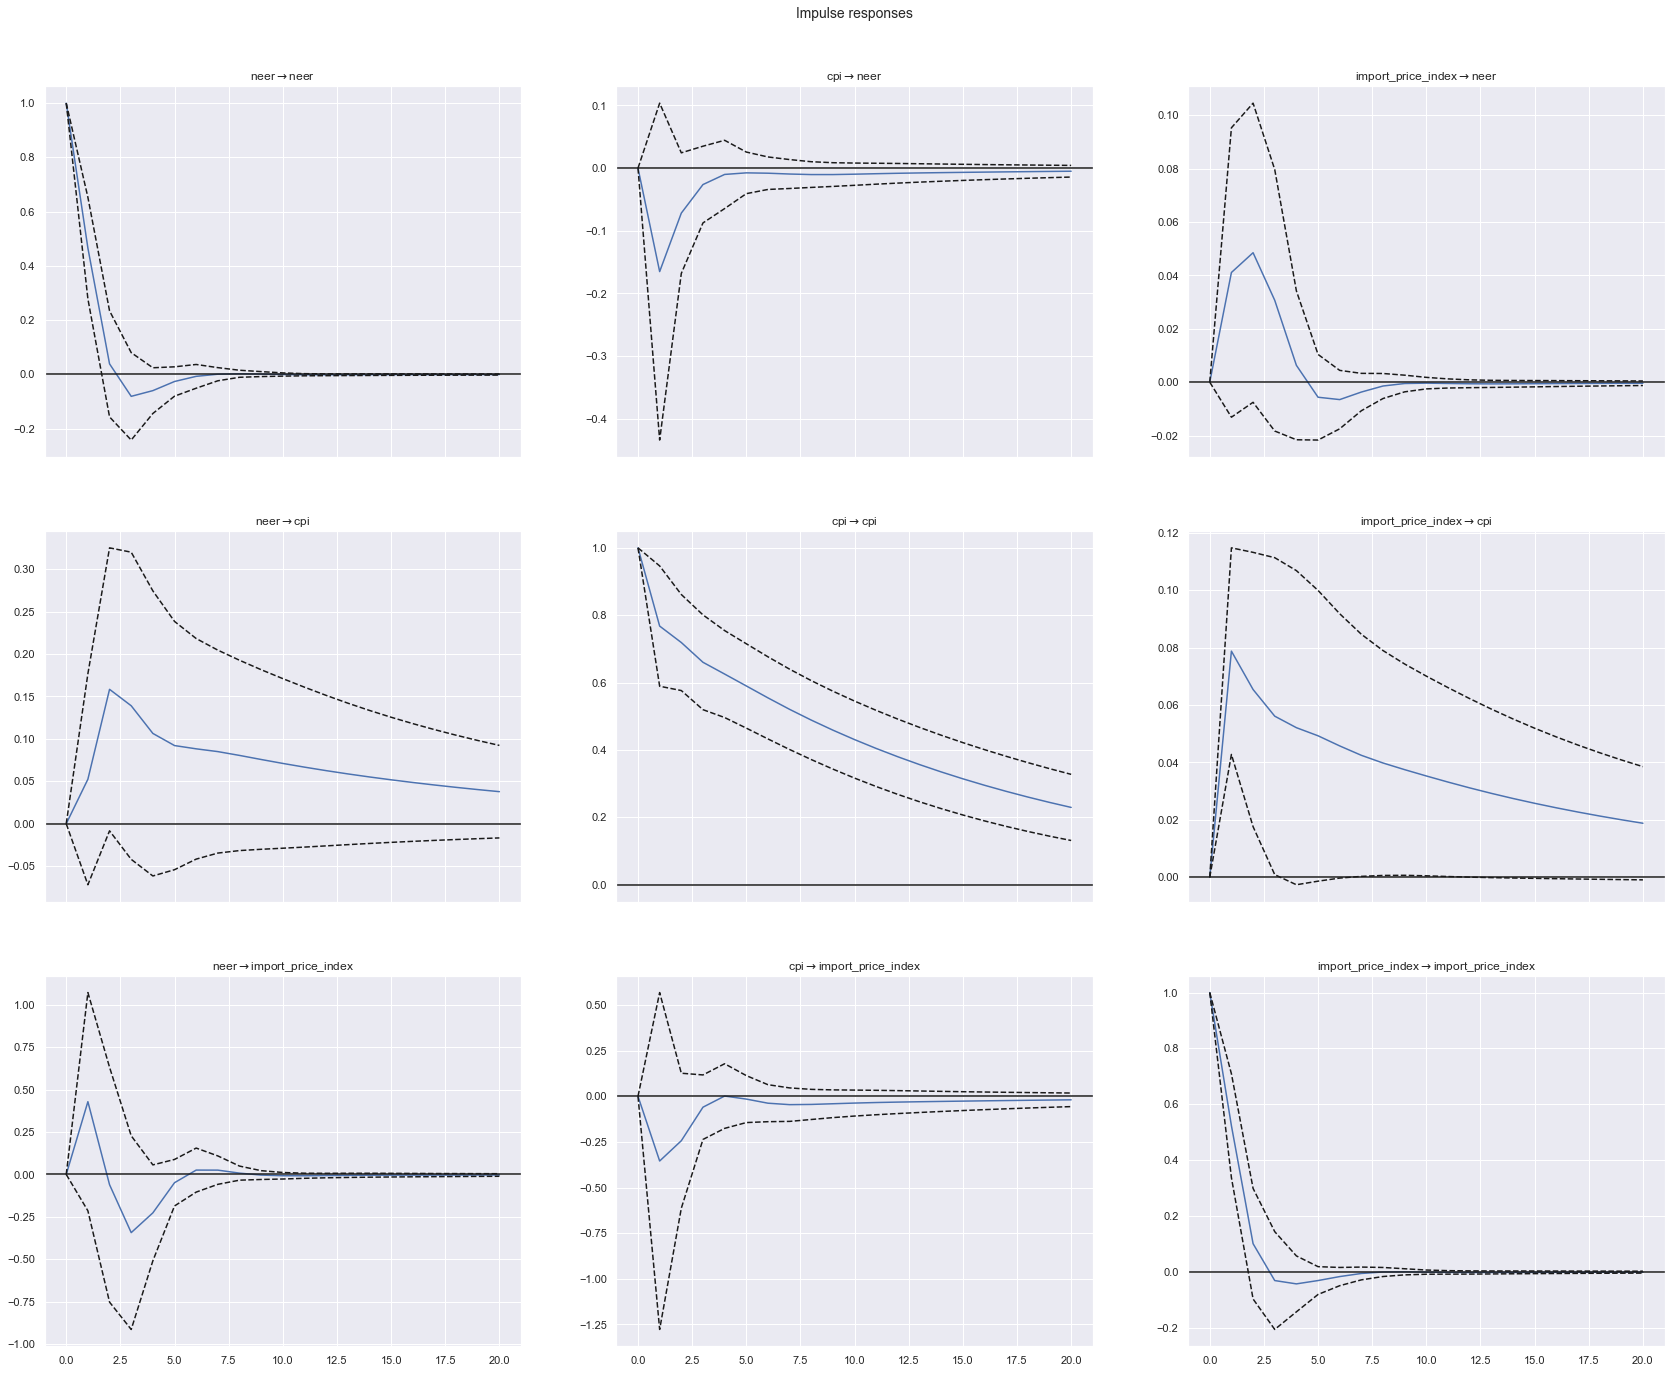

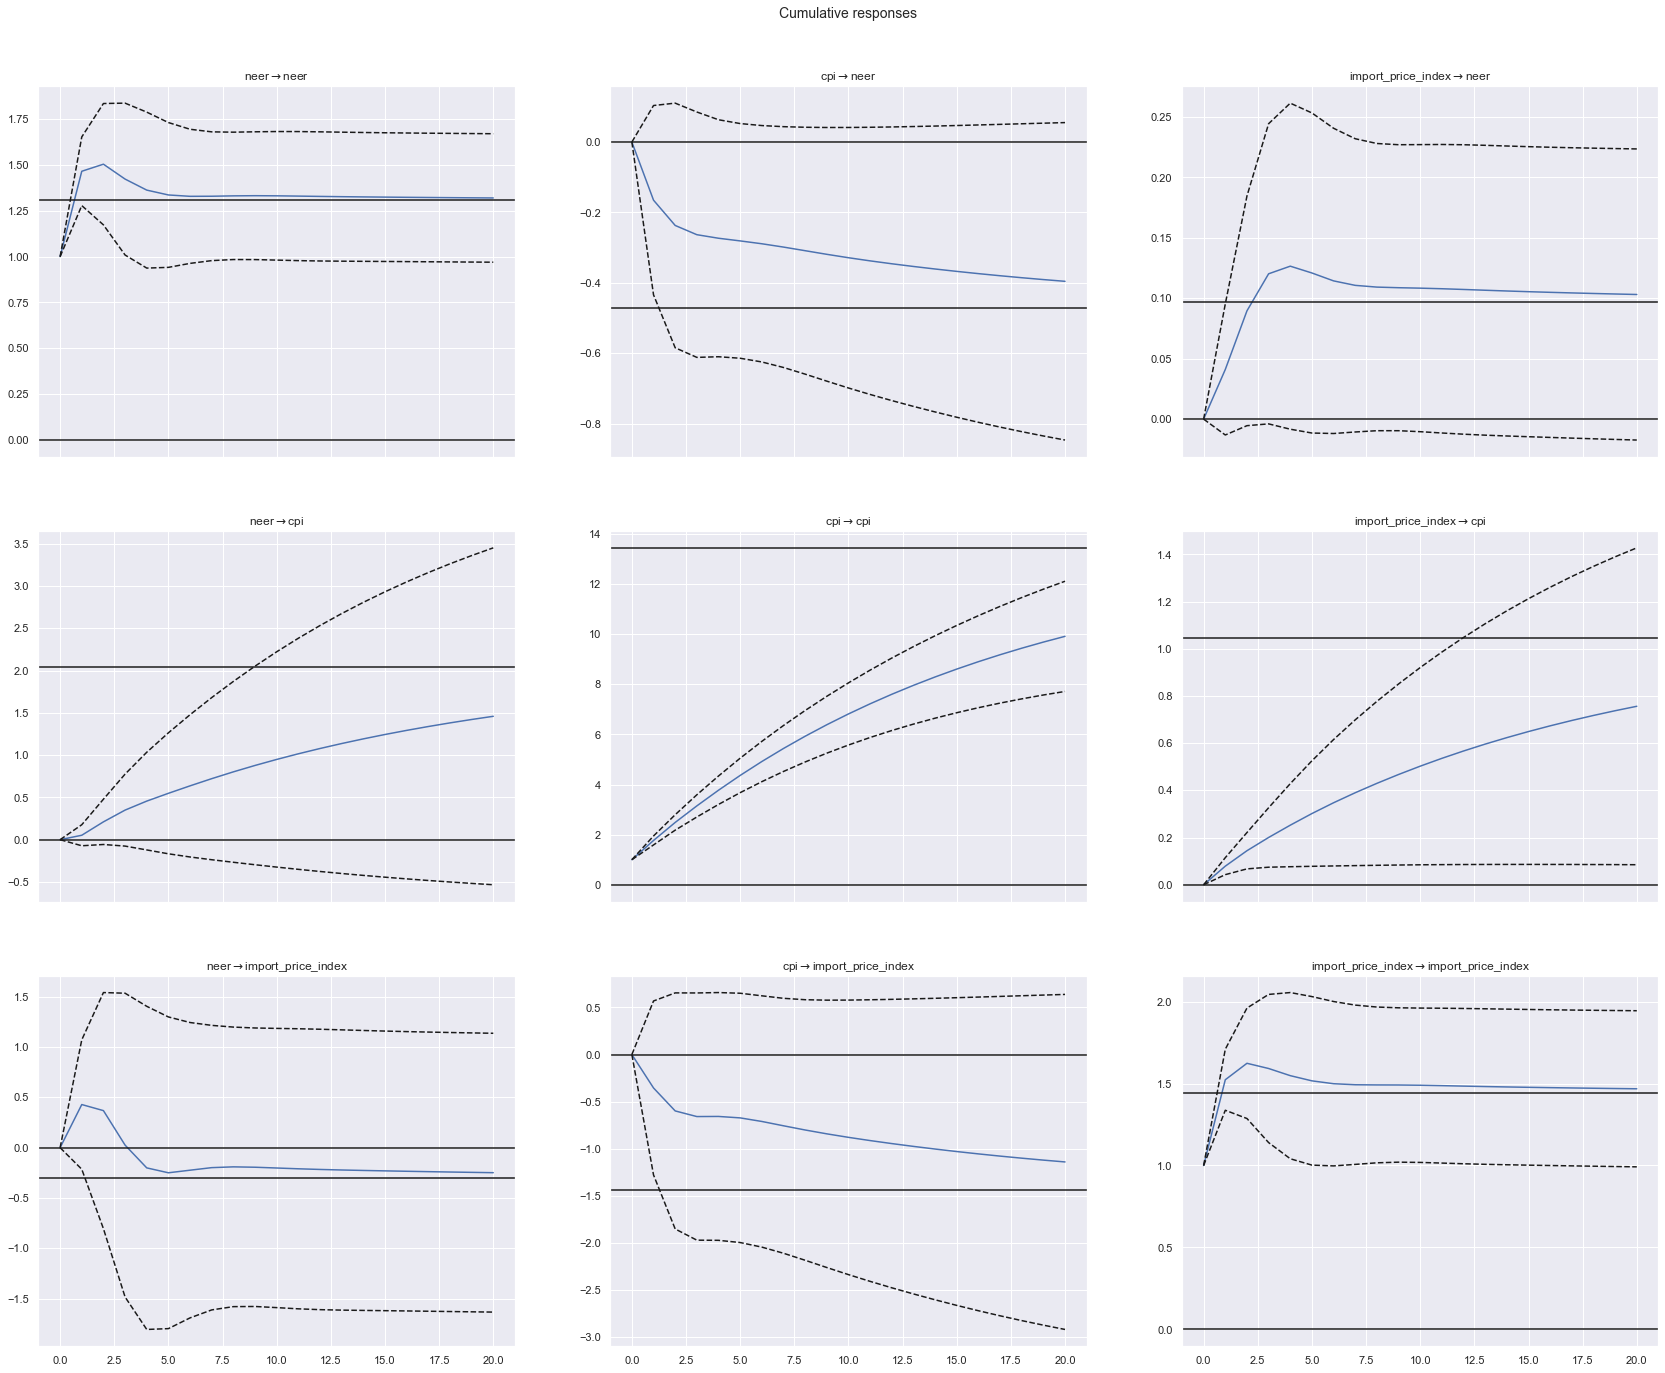

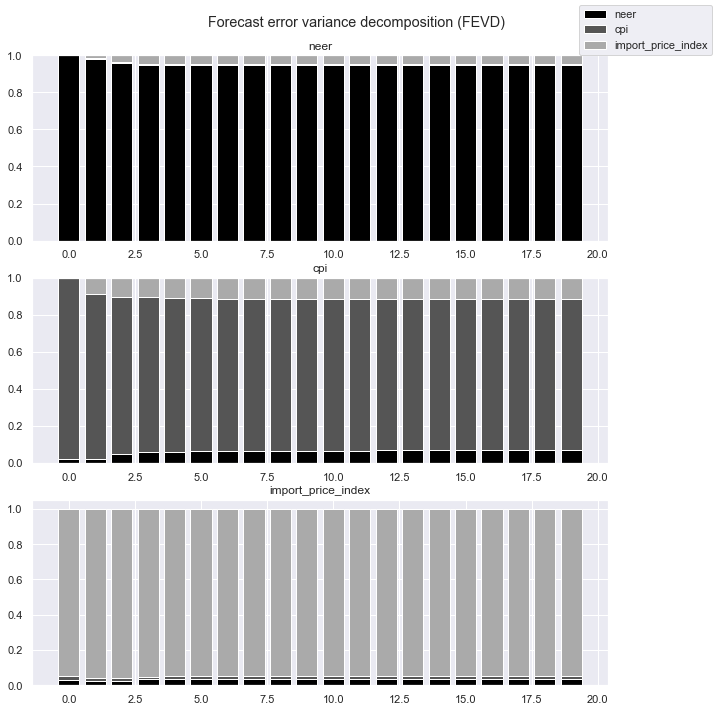

In [23]:
results_file = 'results_lag'+str(selected_order)+'.txt'
structural_file = 'lag'+str(selected_order)
write_results(results_file, results, focused_columns)
structural_analyses(structural_file, results, 20)